# Time Series Classification Algorithms - (5) Interval Based

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on official <a href="https://www.aeon-toolkit.org/en/latest/examples.html" target="_blank">aeon tutorials</a>, and parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

from sklearn import metrics

import time

In [3]:
from aeon.datasets import load_classification
from aeon.utils.discovery import all_estimators

# all_estimators("classifier", tag_filter={"algorithm_type": "interval"})

In [4]:
from aeon.classification.interval_based import (
    RSTSF,
    CanonicalIntervalForestClassifier,
    QUANTClassifier,
    SupervisedTimeSeriesForest,
    TimeSeriesForestClassifier,
)

In [5]:
from pyts.classification import TSBF

In [6]:
DATASET_NAMES = [
    "MelbournePedestrian",
    "ArrowHead",
    "Colposcopy"
]

X_train_dict, y_train_dict = {}, {}
X_test_dict, y_test_dict = {}, {}

accuracy_dict, f1_score_dict, duration_dict = {}, {}, {}

for dataset_name in DATASET_NAMES: 
    X_train_dict[dataset_name], y_train_dict[dataset_name] = load_classification(
        dataset_name, split="train"
    )
    X_test_dict[dataset_name], y_test_dict[dataset_name] = load_classification(
        dataset_name, split="test"
    )

    X_train_dict[dataset_name] = X_train_dict[dataset_name].squeeze(1)
    X_test_dict[dataset_name] = X_test_dict[dataset_name].squeeze(1)

    accuracy_dict[dataset_name] = {}
    f1_score_dict[dataset_name] = {}
    duration_dict[dataset_name] = {}

```bibtex
@article{middlehurst2024,
  author = {Middlehurst, Matthew and Sch{\"a}fer, Patrick and Bagnall, Anthony},
  title = {Bake Off Redux: A Review and Experimental Evaluation of Recent Time Series Classification Algorithms},
  journal = {Data Mining and Knowledge Discovery},
  volume = {38},
  pages = {1958--2031},
  year = {2024},
  doi = {10.1007/s10618-024-01022-1},
  url = {https://doi.org/10.1007/s10618-024-01022-1}
}
```

"Interval based classifiers extract phase dependent intervals of fixed offsets and compute (summary) statistics on these intervals. A majority of approaches include some form of random selection for choosing intervals, where the same random interval locations are used across every series. Many of the interval based classifiers combine features from multiple random intervals. The motivation for taking intervals is to mitigate for confounding noise." \cite{middlehurst2024}

"An example of a problem where interval based approaches may be superior is shown below. Each series is a spectrogram from a bottle of alcohol with a different concentration of ethanol. The discriminatory features are in the near infrared interval (green box to the right). However, the confounding factors such as bottle shape, labelling and colouring cause variation in the visible range (red box to the left). Using intervals containing just the near infrared features is likely to make classification easier." \cite{middlehurst2024}

<img src="images/05_intervalbased.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

"Most recent interval based classifiers adopt a random forest ensemble model, where each base classifier is a pipeline of transformation and a tree classifier." \cite{middlehurst2024}

<img src="images/05_intervalbased2.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

"Diversity is injected through randomising the intervals for each tree. The relation ﬂowchart for interval based algorithms is shown below." \cite{middlehurst2024}

<img src="images/05_intervalbased3.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

## 1. Time Series Forest (TSF)

```bibtex
@article{deng2013,
  author = {Houtao Deng and George Runger and Eugene Tuv and Vladimir Mirkes},
  title = {A time series forest for classification and feature extraction},
  journal = {Information Sciences},
  volume = {239},
  pages = {142--153},
  year = {2013},
  publisher = {Elsevier}
}
```

Proposed by \cite{deng2013}.

```bibtex
@inbook{faouzi2024,
  author = {Johann Faouzi},
  title = {Time Series Classification: A Review of Algorithms and Implementations},
  year = {2024},
  month = {March},
  booktitle = {Advances in Time Series Analysis and Forecasting},
  publisher = {IntechOpen},
  isbn = {978-0-85466-053-7},
  doi = {10.5772/intechopen.1004810},
}
```

"One of the first proposed algorithms based on the random forest algorithm is called time series forest and is relatively simple. The algorithm considers information from subsequences of the time series. Given a minimum length for the subsequences, which is a hyperparameter, random intervals are generated, with the start indices, end indices, and lengths of all the intervals being all randomly generated. For a given time series and a given interval, the corresponding subsequence is the ordered set of values from the time series belonging to the interval. From each subsequence, three features are extracted: the mean, the standard deviation, and the slope. The total number of extracted features is thus three times the number of considered intervals. A random forest classifier is then trained on these extracted features." \cite{faouzi2024}

<img src="images/05_tsf.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

"Predictions for new time series are obtained in the same manner: Given the already generated intervals, the three features are extracted from each subsequence, then the fitted random forest classifier outputs its prediction." \cite{faouzi2024}

In [7]:
method = "TSF"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    tsf = TimeSeriesForestClassifier()
    tsf.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    tsf_preds = tsf.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], tsf_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], tsf_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

TSF
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 5.98 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.73
F1-Score: 0.73
Duration: 1.35 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.38
F1-Score: 0.34
Duration: 1.25 seconds


## 2. Time Series Bag-of-Features (TSBF)

```bibtex
@article{baydogan2013,
  title = {A Bag-of-Features Framework to Classify Time Series},
  author = {Murat G{\"u}nes Baydogan and George Runger and Eugene Tuv},
  article = {IEEE Transactions on Pattern Analysis and Machine Intelligence},
  volume = {35},
  number = {11},
  pages = {2796--2802},
  year = {2013},
  publisher = {IEEE}
}
```

Proposed by \cite{baydogan2013}.


"Time series bag-of-features is a more advanced algorithm also based on features extracted from subsequences and random forest. First, time series bag-of-forest also randomly generates intervals. However, this algorithm extracts more features than time series forest. Each interval is divided into non-overlapping subintervals, and the same three features (mean, standard deviation, and slope) are extracted from the subsequences corresponding to each subinterval. Moreover, four features from each interval are also extracted: the mean and the standard deviation of the subsequence corresponding to this interval, as well as the start and end indices of this interval." \cite{faouzi2024}

"A new data set is created, whose samples are the subsequences extracted from the time series for every interval, and whose features are the aforementioned extracted features. In this new data set, the number of samples is thus the number of time series times the number of intervals, while the number of features is equal to four plus three times the number of subintervals (four features for the interval and three features for each subinterval in the interval). The class of each subsequence is defined as the class of the time series from which the subsequence was extracted." \cite{faouzi2024}

<img src="images/05_tsbagoffeatures.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

"Then, a first random forest classifier is trained on this new data set, then outputs the probabilities to belong to each class for each subsequence. During the training phase, out-of-bag probabilities are actually used to have unbiased estimates of probabilities; that is, only trees that were built on bootstrap samples that did not contain the subsequence are used to compute the probabilities. Then, the probabilities are binned in order to summarize the distribution of the probabilities over all the subsequences; that is, the histogram of probabilities is computed to identify, for each class, how many subsequences were given high probabilities to belong to this class. More precisely, for each time series and for each class, the (out-of-bag) probabilities of belonging to the given class for all the subsequences extracted from the given time series are binned. For each time series and for each class, the mean probability over all the subsequences is also computed. Performing this operation for each time series and each class creates a new data set whose samples are the time series and whose features are the mean and binned probabilities for each class over all the subsequences. Finally, a second random forest classifier is trained on this new data set during the training phase and outputs the predicted class for an unseen time series during the inference phase." \cite{faouzi2024}


In [8]:
method = "TSBF"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    tsbf = TSBF()
    tsbf.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    tsbf_preds = tsbf.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], tsbf_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], tsbf_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

TSBF
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.93
F1-Score: 0.93
Duration: 6.69 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.66
F1-Score: 0.66
Duration: 0.62 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.34
F1-Score: 0.32
Duration: 1.01 seconds


## 3. Supervised Time Series Forest (STSF)

```bibtex
@inproceedings{cabello2020,
  author = {Nicolas Cabello and Ehsan Naghizade and Javen Qi and others},
  title = {Fast and Accurate Time Series Classification Through Supervised Interval Search},
  booktitle = {Proceedings of the IEEE International Conference on Data Mining (ICDM)},
  year = {2020},
  publisher = {IEEE}
}
```

Proposed by \cite{cabello2020}.

"Supervised Time Series Forest (STSF) is an interval based tree ensemble that includes a supervised method for extracting intervals. Intervals are found and extracted for a periodogram and the first order differences representation as well as the base series. STSF introduces bagging for each tree and extracts seven simple summary statistics from each interval. For each tree, an initial split point for the series is randomly selected. For both of these splits, the remaining subseries is cut in half, and the halfwith the higher Fisher score is retained as an interval. This process is then run recursively using higher scored intervals until the series is smaller than a threshold. This is repeated for each of the seven summary statistic features, with the extracted statistic being used to calculate the Fisher score." \cite{middlehurst2024}

In [9]:
method = "STSF"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    stsf = SupervisedTimeSeriesForest()
    stsf.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    stsf_preds = stsf.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], stsf_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], stsf_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

STSF
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 12.71 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.66
F1-Score: 0.66
Duration: 1.90 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.44
F1-Score: 0.34
Duration: 4.39 seconds


## 4. Randomised STSF (RSTSF)

```bibtex
@misc{cabello2021,
  author = {Nicolas Cabello and Ehsan Naghizade and Javen Qi and others},
  title = {Fast, Accurate and Interpretable Time Series Classification Through Randomization},
  year = {2021},
  archivePrefix = {arXiv},
  eprint = {2105.14876},
  primaryClass = {cs.LG},
  note = {Available at \url{https://arxiv.org/abs/2105.14876}}
}
```

Proposed by \cite{cabello2021}.


"Randomised STSF (RSTSF) is an extension of STSF, altering its components with more randomised elements. The split points for interval selection are selected randomly instead of splitting each candidate in half after the first. Intervals extracted from an autoregressive representation are included alongside the previous additions. Features are extracted multiple times from each representation into a single pool. Rather than extract different features for each tree in an ensemble, the features are used in a pipeline to build an Extra Trees classifier." \cite{middlehurst2024}

In [10]:
method = "RSTSF"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    rstsf = RSTSF()
    rstsf.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    rstsf_preds = rstsf.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], rstsf_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], rstsf_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

RSTSF
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.98
F1-Score: 0.98
Duration: 3.75 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.75
F1-Score: 0.75
Duration: 0.59 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.44
F1-Score: 0.32
Duration: 1.28 seconds


## 5. Canonical Interval Forest (CIF)

```bibtex
@inproceedings{middlehurst2020,
  author = {Miles Middlehurst and James Large and Anthony Bagnall},
  title = {The Canonical Interval Forest (CIF) Classifier for Time Series Classification},
  booktitle = {Proceedings of the IEEE International Conference on Big Data},
  pages = {188--195},
  year = {2020},
  publisher = {IEEE}
}
```

Proposed by \cite{middlehurst2020}.

"The Canonical Interval Forest (CIF) is another extension of TSF, that improves accuracy by integrating more informative features and by
increasing diversity. Like other interval approaches, CIF is an ensemble of decision tree classifiers built on features extracted from phase dependent intervals. Alongside the mean, standard deviation and slope, CIF also extracts the Catch22 features. Intervals remain randomly generated, with each tree selecting $k = \sqrt{m \sqrt{d}}$ intervals. To add additional diversity to the ensemble, a attributes out of the pool of 25 are randomly selected for each tree. The extracted features are concatenated into a $k \dot a$ length vector for each time series and used to build the tree. For multivariate data, CIF randomly selects the dimension used for each interval." \cite{middlehurst2024}

In [11]:
method = "CIF"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    cif = CanonicalIntervalForestClassifier()
    cif.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    cif_preds = cif.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], cif_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], cif_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

CIF
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 83.28 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.76
F1-Score: 0.76
Duration: 38.30 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.43
F1-Score: 0.34
Duration: 27.16 seconds


## 6. QUANT

```bibtex
@misc{dempster2023,
  author = {Angus Dempster and Daniel F. Schmidt and Geoffrey I. Webb},
  title = {Quant: A Minimalist Interval Method for Time Series Classification},
  year = {2023},
  archivePrefix = {arXiv},
  eprint = {2308.00928},
  primaryClass = {cs.LG},
  note = {Available at \url{https://arxiv.org/abs/2308.00928}}
}
```

Proposed by \cite{dempster2023}.

"QUANT employs a singular feature type, quantiles, to encapsulate the distribution of a given time series. The method combines four distinct representations, namely raw time series, first-order differences, Fourier coefficients, and second-order differences. The extraction process involves fixed, dyadic intervals derived from the time series. These disjoint intervals are constructed through a pyramid structure, where each level successively halves the interval length. At depths greater than one, an identical set of intervals, shifted by half the interval length, is also included. The total count of intervals is calculated as $2^{(d - 1)} \times 4 - 2 - d$ for a depth of $d = \min(6, \log_2 n + 1)$. Each representation can have up to 120 intervals, resulting in a total of 480 intervals across all four representations. The concatenated feature vector is used to build an Extra Trees classifier." \cite{middlehurst2024}

In [12]:
method = "QUANT"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    quant = QUANTClassifier()
    quant.fit(X_train_dict[dataset_name], y_train_dict[dataset_name])
    quant_preds = quant.predict(X_test_dict[dataset_name])
    accuracy_dict[dataset_name][method] = metrics.accuracy_score(
        y_test_dict[dataset_name], quant_preds
    )
    f1_score_dict[dataset_name][method] = metrics.f1_score(
        y_test_dict[dataset_name], quant_preds,
        average="weighted"
    )

    elapsed_time = time.time() - start_time
    duration_dict[dataset_name][method] = elapsed_time
    print("-------------------------------------------")
    print(f"Dataset: {dataset_name}")
    print(f"Accuracy: {accuracy_dict[dataset_name][method]:.2f}")
    print(f"F1-Score: {f1_score_dict[dataset_name][method]:.2f}")
    print(f"Duration: {duration_dict[dataset_name][method]:.2f} seconds")

QUANT
-------------------------------------------
Dataset: MelbournePedestrian
Accuracy: 0.97
F1-Score: 0.97
Duration: 0.33 seconds
-------------------------------------------
Dataset: ArrowHead
Accuracy: 0.81
F1-Score: 0.81
Duration: 0.18 seconds
-------------------------------------------
Dataset: Colposcopy
Accuracy: 0.47
F1-Score: 0.38
Duration: 0.35 seconds


## 7. Comparison between the Classifiers

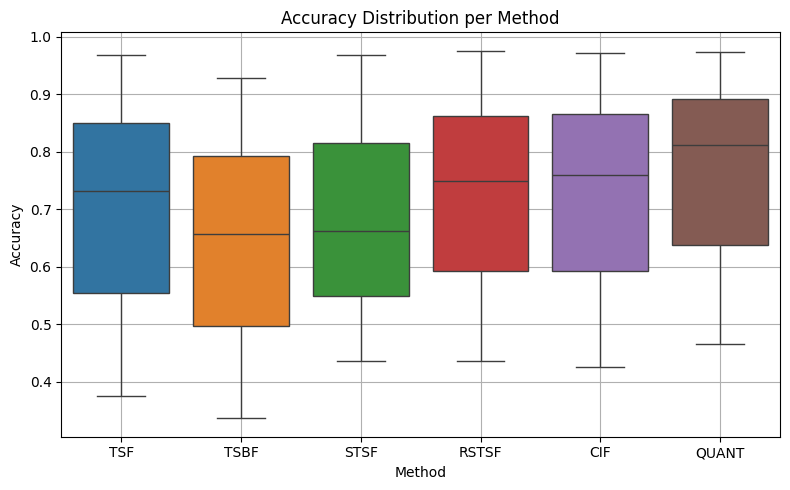

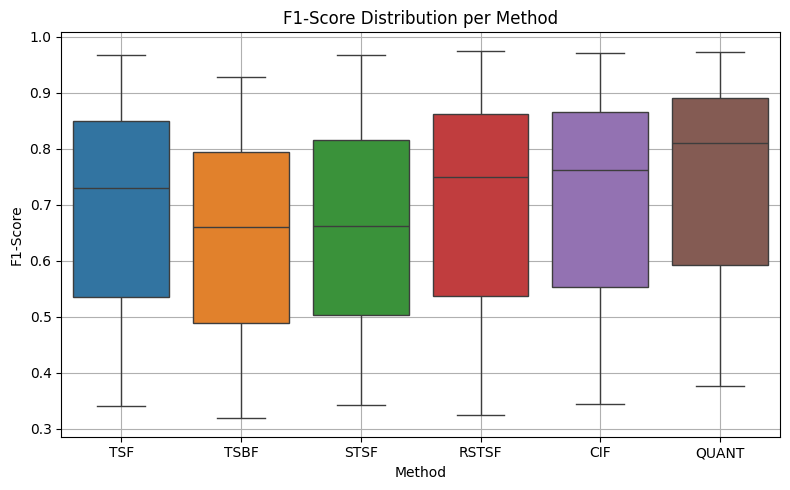

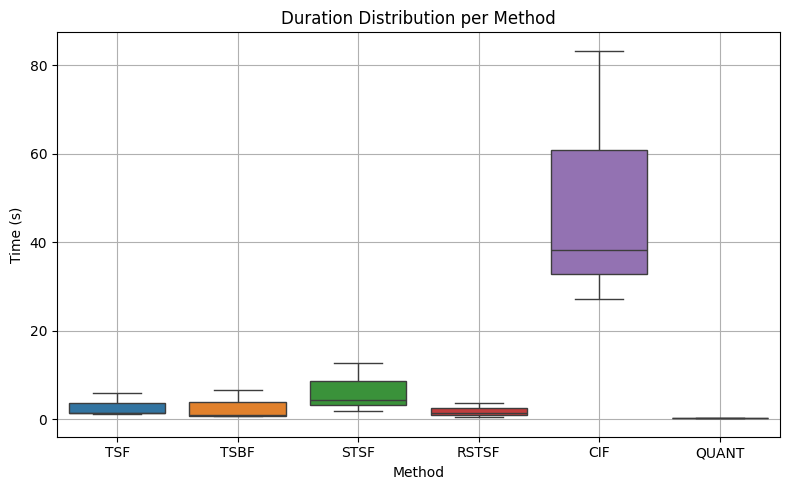

In [13]:
datasets = list(accuracy_dict.keys())
methods = list(next(iter(accuracy_dict.values())).keys())

def prepare_long_format(metric_dict, metric_name):
    records = []
    for ds in datasets:
        for method in methods:
            val = metric_dict[ds][method]
            if isinstance(val, (int, float)):
                records.append({
                    "Dataset": ds,
                    "Method": method,
                    "Metric": float(val),
                    "Type": metric_name
                })
    return pd.DataFrame(records)

df_accuracy = prepare_long_format(accuracy_dict, "Accuracy")
df_f1 = prepare_long_format(f1_score_dict, "F1-Score")
df_duration = prepare_long_format(duration_dict, "Duration (s)")

df_all = pd.concat([df_accuracy, df_f1, df_duration], ignore_index=True)

def plot_boxplot(df, title, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Method", y="Metric", hue="Method")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Method")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_boxplot(df_accuracy, "Accuracy Distribution per Method", "Accuracy")
plot_boxplot(df_f1, "F1-Score Distribution per Method", "F1-Score")
plot_boxplot(df_duration, "Duration Distribution per Method", "Time (s)")